In [1]:
!pip install indic-transliteration
!pip install langdetect
!pip install deep_translator
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 4.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=7a3bdb912d373bd2185f4c8d4d249ee16f65f15e06cb1ddcd2b6c3d9dcb4d695
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils  import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from indic_transliteration import sanscript
from langdetect import detect
from deep_translator import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import re
import nltk
import unicodedata
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import transformers
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup



In [3]:
data = pd.read_csv('/content/df.csv',delimiter=',')
data.insert(2,'converted',' ')
data.insert(3,'preprocessed',' ')


In [4]:
#Preprocessing-1
def remove_special_chars(text):
  special_chars = ['!','\"','#','$','%','&',"\'",'(', ')','*','+','-','.','...','/',':',';','<','=','>','?']
  current  = text.split()
  for i in current:
    if i in special_chars:
      current.remove(i)
  return " ".join(current)

In [5]:
for i in range(len(data['JOKES'])):
  data['preprocessed'][i] = remove_special_chars(data['JOKES'][i])

<ipython-input-5-506c0aab2dba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['preprocessed'][i] = remove_special_chars(data['JOKES'][i])


In [6]:
# Detecting language kannada or english
def check_language(word):
    if all(unicodedata.category(c).startswith('L') for c in word):
        if any(0x0C80 <= ord(c) <= 0x0CFF for c in word):
            return 'Kannada'
        else:
            return 'English'
    else:
        return 'Not a word'



In [7]:
# Preprocessing-2
def to_kannada(text):
  res = []
  for i in text.split(" "):
    if check_language(i) == "English":
      result = GoogleTranslator(source='auto', target='kn').translate(i)
      res.append(result)
    else:
      res.append(i)
  return " ".join(res)

In [8]:
for i in range(len(data['preprocessed'])):
  
  data['converted'][i] = to_kannada(data['preprocessed'][i])

<ipython-input-8-bd4cc9075dbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['converted'][i] = to_kannada(data['preprocessed'][i])


In [9]:
sentences = data['converted'].tolist()
labels = data['LABEL'].tolist()

In [10]:
!pip install git+https://github.com/AI4Bharat/indic-bert


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Bharat/indic-bert to /tmp/pip-req-build-01br0fsn
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Bharat/indic-bert /tmp/pip-req-build-01br0fsn
  Resolved https://github.com/AI4Bharat/indic-bert to commit d5c5c021c30fbf5af44c3e4817d497acfc11f943
ERROR: git+https://github.com/AI4Bharat/indic-bert does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [11]:
!pip install transformers[sentencepiece]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader
import torch

# Tokenize the sentences using RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

encoded_dict = tokenizer.batch_encode_plus(
    sentences,
    add_special_tokens=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)
input_ids = encoded_dict['input_ids']
attention_masks = encoded_dict['attention_mask']
labels = torch.tensor(labels)

# Create a TensorDataset
dataset = TensorDataset(input_ids, attention_masks, labels)

# Split the dataset into train, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_size = int(train_ratio * len(dataset))
val_size = int(val_ratio * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, temp_dataset = train_test_split(dataset, train_size=train_size, test_size=(val_size + test_size))
val_dataset, test_dataset = train_test_split(temp_dataset, train_size=val_size, test_size=test_size)

# Define the model
model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False
)

# Set up the optimizer, scheduler, and batch size
optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)
epochs = 10
total_steps = len(train_dataset) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
batch_size = 32

# Create DataLoader for training, validation, and test sets
train_dataloader = DataLoader(
    train_dataset,
    sampler=torch.utils.data.RandomSampler(train_dataset),
    batch_size=batch_size
)

validation_dataloader = DataLoader(
    val_dataset,
    sampler=torch.utils.data.SequentialSampler(val_dataset),
    batch_size=batch_size
)

test_dataloader = DataLoader(
    test_dataset,
    sampler=torch.utils.data.SequentialSampler(test_dataset),
    batch_size=batch_size
)

# Train the RoBERTa model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print('Training RoBERTa model...')
for epoch in range(epochs):
    model.train()

    for batch in train_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(
            batch_input_ids,
            token_type_ids=None,
            attention_mask=batch_attention_masks,
            labels=batch_labels
        )

        loss = outputs.loss
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        scheduler.step()

    # Evaluate the model on the validation set
    model.eval()

    val_loss = 0
    val_accuracy = 0

    for batch in validation_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(
                batch_input_ids,
                token_type_ids=None,
                attention_mask=batch_attention_masks,
                labels=batch_labels
            )

        loss = outputs.loss
        logits = outputs.logits

        val_loss += loss.item()

        preds = torch.argmax(logits, dim=1).flatten()
        accuracy = (preds == batch_labels).cpu().numpy().mean()
        val_accuracy += accuracy

    avg_val_loss = val_loss / len(validation_dataloader)
    avg_val_accuracy = val_accuracy / len(validation_dataloader)

    print(f'Epoch {epoch + 1}/{epochs}')
    print(f'Training Loss: {loss.item():.3f}')
    print(f'Validation Loss: {avg_val_loss:.3f}')
    print(f'Validation Accuracy: {avg_val_accuracy:.3f}')

# Evaluate the model on the test set
model.eval()

test_loss = 0
test_accuracy = 0

for batch in test_dataloader:
    batch_input_ids = batch[0].to(device)
    batch_attention_masks = batch[1].to(device)
    batch_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = model(
            batch_input_ids,
            token_type_ids=None,
            attention_mask=batch_attention_masks,
            labels=batch_labels
        )

    loss = outputs.loss
    logits = outputs.logits

    test_loss += loss.item()

    preds = torch.argmax(logits, dim=1).flatten()
    accuracy = (preds == batch_labels).cpu().numpy().mean()
    test_accuracy += accuracy

avg_test_loss = test_loss / len(test_dataloader)
avg_test_accuracy = test_accuracy / len(test_dataloader)

print('Test Loss:', avg_test_loss)
print('Test Accuracy:', avg_test_accuracy)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

Training RoBERTa model...
Epoch 1/10
Training Loss: 0.722
Validation Loss: 0.702
Validation Accuracy: 0.464
Epoch 2/10
Training Loss: 0.693
Validation Loss: 0.693
Validation Accuracy: 0.543
Epoch 3/10
Training Loss: 0.661
Validation Loss: 0.691
Validation Accuracy: 0.536
Epoch 4/10
Training Loss: 0.684
Validation Loss: 0.691
Validation Accuracy: 0.536
Epoch 5/10
Training Loss: 0.676
Validation Loss: 0.691
Validation Accuracy: 0.536
Epoch 6/10
Training Loss: 0.700
Validation Loss: 0.695
Validation Accuracy: 0.464
Epoch 7/10
Training Loss: 0.682
Validation Loss: 0.691
Validation Accuracy: 0.536
Epoch 8/10
Training Loss: 0.685
Validation Loss: 0.692
Validation Accuracy: 0.536
Epoch 9/10
Training Loss: 0.672
Validation Loss: 0.690
Validation Accuracy: 0.536
Epoch 10/10
Training Loss: 0.679
Validation Loss: 0.691
Validation Accuracy: 0.536
Test Loss: 0.6932016611099243
Test Accuracy: 0.5099431818181819


In [13]:
from sklearn.metrics import confusion_matrix

# Initialize empty lists for true and predicted labels
true_labels = []
predicted_labels = []

# Evaluate the model on the test set
model.eval()

test_loss = 0
test_accuracy = 0

for batch in test_dataloader:
    batch_input_ids = batch[0].to(device)
    batch_attention_masks = batch[1].to(device)
    batch_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = model(
            batch_input_ids,
            token_type_ids=None,
            attention_mask=batch_attention_masks,
            labels=batch_labels
        )

    loss = outputs[0]
    logits = outputs[1]

    test_loss += loss.item()

    preds = torch.argmax(logits, dim=1).flatten()
    accuracy = (preds == batch_labels).cpu().numpy().mean()
    test_accuracy += accuracy

    true_labels += batch_labels.tolist()
    predicted_labels += preds.tolist()

avg_test_loss = test_loss / len(test_dataloader)
avg_test_accuracy = test_accuracy / len(test_dataloader)

print('Test Loss:', avg_test_loss)
print('Test Accuracy:', avg_test_accuracy)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(cm)


Test Loss: 0.6932016611099243
Test Accuracy: 0.5099431818181819
Confusion Matrix:
[[25  0]
 [18  0]]


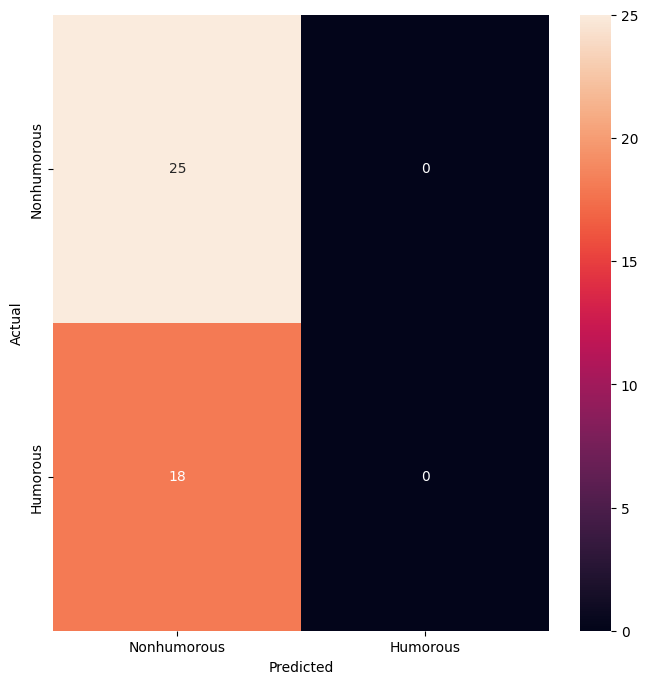

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Evaluate the model on the test set
model.eval()

test_preds = []
test_labels = []

for batch in test_dataloader:
    batch_input_ids = batch[0].to(device)
    batch_attention_masks = batch[1].to(device)
    batch_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = model(
            batch_input_ids,
            token_type_ids=None,
            attention_mask=batch_attention_masks,
            labels=batch_labels
        )

    logits = outputs[1]

    preds = torch.argmax(logits, dim=1).flatten()
    test_preds.extend(preds.cpu().numpy())
    test_labels.extend(batch_labels.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_preds)

# Define class labels
class_labels = ['Non-Humor', 'Humor']
fig, ax = plt.subplots(figsize=(8, 8))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Nonhumorous', 'Humorous'], yticklabels=['Nonhumorous', 'Humorous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
